In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/gdrive/My Drive/Data/Exasens.csv')
data.head()

,Diagnosis,ID,Imaginary Part,Unnamed: 3,Real Part,Unnamed: 5,Gender,Age,Smoking,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Min,Avg.,Min,Avg.,NaN,NaN,NaN,NaN,NaN,Gender,Somking
2,COPD,301-4,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0,NaN,NaN,Male=1,Non-smoker=1
3,COPD,302-3,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0,NaN,NaN,Female=0,Ex-smoker=2
4,COPD,303-3,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0,NaN,NaN,NaN,Active-smoker=3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       399 non-null    object 
 1   ID              399 non-null    object 
 2   Imaginary Part  101 non-null    object 
 3   Unnamed: 3      101 non-null    object 
 4   Real Part       101 non-null    object 
 5   Unnamed: 5      101 non-null    object 
 6   Gender          399 non-null    float64
 7   Age             399 non-null    float64
 8   Smoking         399 non-null    float64
 9   Unnamed: 9      0 non-null      float64
 10  Unnamed: 10     0 non-null      float64
 11  Unnamed: 11     3 non-null      object 
 12  Unnamed: 12     4 non-null      object 
dtypes: float64(5), object(8)
memory usage: 40.9+ KB


In [ ]:
data=data.drop(['Unnamed: 3','Unnamed: 5','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12'], axis=1)
data

,Diagnosis,ID,Imaginary Part,Real Part,Gender,Age,Smoking
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Min,Min,NaN,NaN,NaN
2,COPD,301-4,-320.61,-495.26,1.0,77.0,2.0
3,COPD,302-3,-325.39,-473.73,0.0,72.0,2.0
4,COPD,303-3,-323,-476.12,1.0,73.0,3.0
...,...,...,...,...,...,...,...
396,Infected,I176,NaN,NaN,0.0,49.0,2.0
397,Infected,I177,NaN,NaN,0.0,37.0,1.0
398,Infected,I178,NaN,NaN,0.0,29.0,1.0
399,Infected,I179,NaN,NaN,1.0,51.0,1.0


In [ ]:
data.isnull().sum()

Diagnosis           2
ID                  2
Imaginary Part    300
Real Part         300
Gender              2
Age                 2
Smoking             2
dtype: int64

In [ ]:
dataTemp=data.dropna()
dataTemp

,Diagnosis,ID,Imaginary Part,Real Part,Gender,Age,Smoking
2,COPD,301-4,-320.61,-495.26,1.0,77.0,2.0
3,COPD,302-3,-325.39,-473.73,0.0,72.0,2.0
4,COPD,303-3,-323,-476.12,1.0,73.0,3.0
5,COPD,304-4,-327.78,-473.73,1.0,76.0,2.0
6,COPD,305-4,-325.39,-478.52,0.0,65.0,2.0
...,...,...,...,...,...,...,...
368,Infected,148-5,-323,-476.12,1.0,38.0,1.0
369,Infected,149-5,-323,-476.12,1.0,36.0,1.0
370,Infected,150-5,-323,-480.91,0.0,33.0,1.0
371,Infected,151-4,-327.78,-476.12,1.0,43.0,1.0


In [ ]:
dataTemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 2 to 377
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       100 non-null    object 
 1   ID              100 non-null    object 
 2   Imaginary Part  100 non-null    object 
 3   Real Part       100 non-null    object 
 4   Gender          100 non-null    float64
 5   Age             100 non-null    float64
 6   Smoking         100 non-null    float64
dtypes: float64(3), object(4)
memory usage: 6.2+ KB


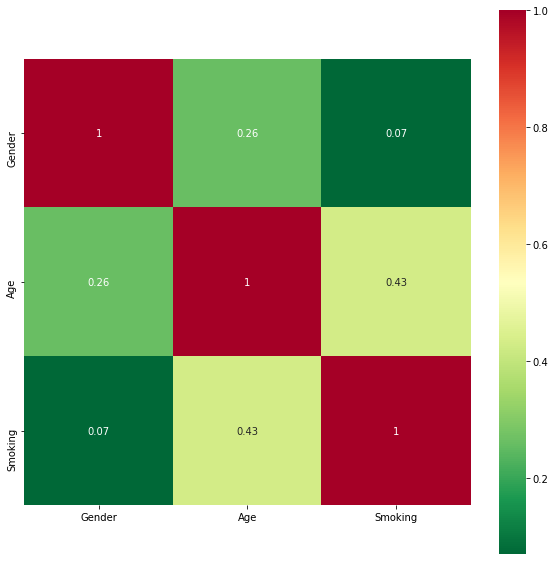

In [ ]:
import matplotlib.pyplot as plt
correlation = dataTemp.corr()
plt.subplots(figsize = (10,10))
sns.heatmap(correlation.round(2), 
            annot = True, 
            vmax = 1, 
            square = True, 
            cmap = 'RdYlGn_r')
plt.show()

In [ ]:
temp=dataTemp.iloc[:, 5:7]
temp

,Age,Smoking
2,77.0,2.0
3,72.0,2.0
4,73.0,3.0
5,76.0,2.0
6,65.0,2.0
...,...,...
368,38.0,1.0
369,36.0,1.0
370,33.0,1.0
371,43.0,1.0


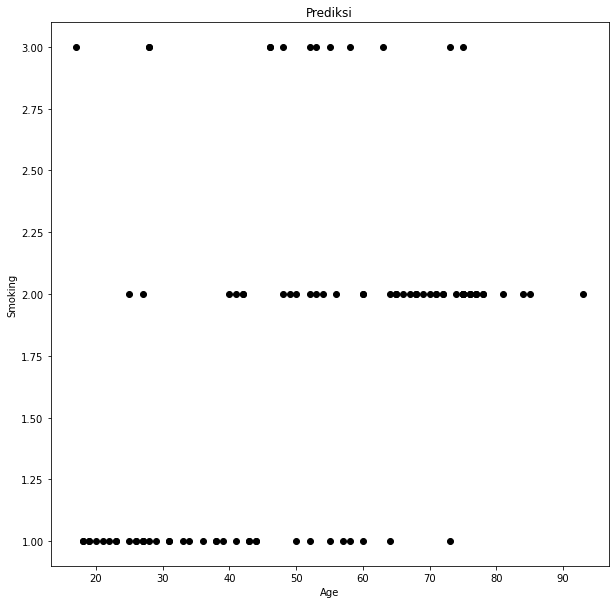

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.title('Prediksi')
plt.xlabel('Age')
plt.ylabel('Smoking')
plt.scatter(temp['Age'], temp['Smoking'], color='k')

In [ ]:
float_array = temp['Age'].values.astype(float)
float_array = float_array.reshape(-1,1)
min_max_scaler = MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
temp['Age'] = scaled_array

In [ ]:
float_array = temp['Smoking'].values.astype(float)
float_array = float_array.reshape(-1,1)
min_max_scaler = MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
temp['Smoking'] = scaled_array

In [ ]:
temp_array =  np.array(temp)
temp_array

In [ ]:
Cluster = KMeans(n_clusters =2, random_state=123)
Cluster.fit(temp_array)
print(Cluster.cluster_centers_)#--- Menampilkan pusat cluster ---

[[0.59210526 0.60483871]
 [0.24792244 0.        ]]


In [ ]:
print(Cluster.labels_)#--- Menampilkan Hasil Kluster ---


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0]


In [ ]:
dataTemp["kluster"] = Cluster.labels_ 
dataTemp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Diagnosis,ID,Imaginary Part,Real Part,Gender,Age,Smoking,kluster
2,COPD,301-4,-320.61,-495.26,1.0,77.0,2.0,0
3,COPD,302-3,-325.39,-473.73,0.0,72.0,2.0,0
4,COPD,303-3,-323,-476.12,1.0,73.0,3.0,0
5,COPD,304-4,-327.78,-473.73,1.0,76.0,2.0,0
6,COPD,305-4,-325.39,-478.52,0.0,65.0,2.0,0
...,...,...,...,...,...,...,...,...
368,Infected,148-5,-323,-476.12,1.0,38.0,1.0,1
369,Infected,149-5,-323,-476.12,1.0,36.0,1.0,1
370,Infected,150-5,-323,-480.91,0.0,33.0,1.0,1
371,Infected,151-4,-327.78,-476.12,1.0,43.0,1.0,1


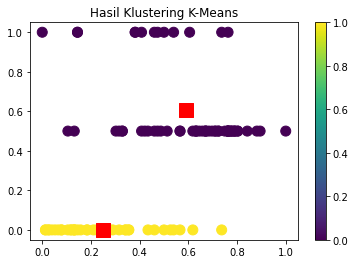

In [ ]:
#--- Memvisualkan hasil kluster ---
output = plt.scatter(temp_array[:,0], temp_array[:,1], s = 100, c = temp.kluster, marker = "o", alpha = 1, )
centers = Cluster.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="s");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

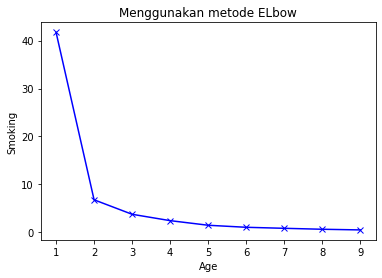

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(temp)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Age')
plt.ylabel('Smoking')
plt.title('Menggunakan metode ELbow')
plt.show()


In [ ]:
print('Nilai SSE terkecil :',km.inertia_) #Nilai SSE terkecil 
print(Sum_of_squared_distances)

Nilai SSE terkecil : 0.4998148021700563
[41.75193905817176, 6.782027028298115, 3.760254777609452, 2.433806419571017, 1.471317550370528, 1.0475796250917442, 0.8362381929385861, 0.6362498986250158, 0.4998148021700563]


In [ ]:
from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(temp)
    centers = clusterer.cluster_centers_

    score = silhouette_score(temp, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.766854721577236)
For n_clusters = 3, silhouette score is 0.7031365206164925)
For n_clusters = 4, silhouette score is 0.7075916230116147)
For n_clusters = 5, silhouette score is 0.6312212762751518)
For n_clusters = 6, silhouette score is 0.6449352694600101)
For n_clusters = 7, silhouette score is 0.6403330454429822)
For n_clusters = 8, silhouette score is 0.5799026755960583)
For n_clusters = 9, silhouette score is 0.5826408320832531)
